In [468]:
def seasonal_index_cal(data_frame):
    upper=data_frame.max()
    lower=data_frame.min()
    s_index_col=((data_frame-lower)/(upper - lower))*100
    data_frame['SI']=s_index_col.mean(axis=1,skipna=True)

    upper_SI=data_frame['SI'].max()
    lower_SI=data_frame['SI'].min()
    data_frame['SI']=((data_frame['SI']-lower_SI)/(upper_SI - lower_SI))*100
    
    return data_frame

def create_sprd(dataframe1, dataframe2):
   
    dataframe1.reset_index(inplace=True)
    dataframe2.reset_index(inplace=True)
    date=dataframe1['Date']
    
    dataframe1.drop(columns=['Date'],inplace=True)
    dataframe2.drop(columns=['Date'],inplace=True)
    
    while True:
        sprd_type=int(raw_input('Please indicate if this is a 1) Crack or 2) Spread - please input integer 1 or 2: '))
        
        if sprd_type==1:
            
            new_df=dataframe1*42-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            return new_df
            
            break
        
        elif sprd_type==2:
            
            new_df= dataframe1-dataframe2
            new_df['Date']=date
            new_df.set_index('Date',inplace=True)
            return new_df
            break
        
        else:
            print 'You have inputted incorrectly. Please try again and enter either integer 1 or 2.'
    

class Mth_1(object):
    
    def __init__(self):
        pass
        
    def pdt_type1(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='Brent'
                break
            elif inst==2:
                product='Gasoil'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RBOB'
                break       
            elif inst==5:
                product='WTI'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no1(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self,start_mth,start_day,end_mth,end_day,i):

        count=0
        path = os.getcwd()
        
        #start_mth=raw_input('Please input start mth of seasonal period in MM format: ')
        #start_day=raw_input('Please input start day of seasonal period in DD format: ')
            
        #end_mth=raw_input('Please input end mth of seasonal period in MM format: ')
        #end_day=raw_input('Please input end day of seasonal period in DD format: ')
            
        #i=int(raw_input('Please input 1 if seasonal period crosses year and 0 if not: '))
        
        
        listing = os.listdir(path)
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string

            start_date=seasonal_year+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+i)+'-'+end_mth+'-'+end_day # create end date
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date
    

            #upper=temp['Settle'].max() # get max value
            #lower=temp['Settle'].min() # get min value
    
            #temp['SI']=((temp['Settle']-lower)/(upper-lower))*100 # create seasonal index column
            #temp=temp.set_index('Date') # creating new index as Date

            #temp=temp.reset_index() # putting date back out into col
            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') #putting date as mm/dd format
            temp=temp.set_index('Date') # set index as date

    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change', 'Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
            
            

class Mth_2(object):
    
    def __init__(self):
        pass
        
    def pdt_type2(self):
        
        product=''
        while True:
            inst=int(raw_input('Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: '))
    
            if inst==1:
                product='Brent'
                break
            elif inst==2:
                product='Gasoil'
                break   
            elif inst==3:
                product='HO'
                break      
            elif inst==4:
                product='RBOB'
                break       
            elif inst==5:
                product='WTI'
                break       
            else:
                print 'You did not input a correct number. Please try again.'
        
        return product
        
    
    def mth_no2(self):
        month=''
        while True:
            Mth=int(raw_input('Please input the month of the contract which you wish to evaluate in numbers from 1-12: '))
    
            if Mth==1:
                month='Jan'
                break
            elif Mth==2:
                month='Feb'
                break   
            elif Mth==3:
                month='Mar'
                break   
            elif Mth==4:
                month='Apr'
                break   
            elif Mth==5:
                month='May'
                break          
            elif Mth==6:
                month='Jun'
                break   
            elif Mth==7:
                month='Jul'
                break   
            elif Mth==8:
                month='Aug'
                break   
            elif Mth==9:
                month='Sep'
                break   
            elif Mth==10:
                month='Oct'
                break   
            elif Mth==11:
                month='Nov'
                break   
            elif Mth==12:
                month='Dec'
                break 
            else:
                print 'You did not input a correct number. Please try again.'
        
        return month

    def dataframe_create(self, start_mth, start_day, end_mth,end_day,i):

        count=0
        path = os.getcwd()

        #start_mth=raw_input('Please input start mth of seasonal period in MM format: ')
        #start_day=raw_input('Please input start day of seasonal period in DD format: ')
            
        #end_mth=raw_input('Please input end mth of seasonal period in MM format: ')
        #end_day=raw_input('Please input end day of seasonal period in DD format: ')
            
        #i=int(raw_input('Please input 1 if seasonal period crosses year and 0 if not: '))
        
        listing = os.listdir(path)
        for infile in listing:
            temp=pd.read_excel(infile) #read each file into panda dataframe
    
            contract_yr_str=infile[-8:-4] # get the contract year
    
            seasonal_year=int(contract_yr_str)-1 # get the seasonal year to create the index - prev year
            seasonal_year=str(seasonal_year) # convert to string
     
            start_date=seasonal_year+'-'+start_mth+'-'+start_day # create start date
            end_date=str(int(seasonal_year)+i)+'-'+end_mth+'-'+end_day # create end date
    
            temp=temp[temp['Date']>=start_date] # filter for start date

            temp=temp[temp['Date']<=end_date] # filter for end date
    

            #upper=temp['Settle'].max() # get max value
            #lower=temp['Settle'].min() # get min value
    
            #temp['SI']=((temp['Settle']-lower)/(upper-lower))*100 # create seasonal index column
            #temp=temp.set_index('Date') # creating new index as Date

            #temp=temp.reset_index() # putting date back out into col
            temp['Date']=pd.to_datetime(temp['Date']).dt.strftime('%m/%d') #putting date as mm/dd format
            temp=temp.set_index('Date') # set index as date

    
            if count==0:
                Seasonal_Combi=temp
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)
        
                count+=1
        
            else:
    
                seasonal_year=str(int(seasonal_year)+1)
                Seasonal_Combi['Settle']=temp['Settle']
                Seasonal_Combi.rename(columns={'Settle':seasonal_year},inplace=True)

        Seasonal_Combi.drop(columns=['Open','High','Low','Last','Change','Volume','Prev. Day Open Interest'],inplace=True)   

        
        return Seasonal_Combi
    
    

import pandas as pd
import os

%matplotlib inline

#user specify instrument and contract month

product1=''
month1=''
product2=''
month2=''

front_mth=Mth_1()
product1 = front_mth.pdt_type1()
month1=front_mth.mth_no1()

back_mth=Mth_2()
product2=back_mth.pdt_type2()
month2=back_mth.mth_no2()

        

Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 4
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 3
Please input the number of the product you want to see the seasonals: 1) Brent 2) Gasoil 3) HO 4) RBOB 5) WTI: 4
Please input the month of the contract which you wish to evaluate in numbers from 1-12: 5


In [469]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [470]:
cd $product1

C:\Users\boonsin.teo\Documents\Quandl\RBOB


In [471]:
cd $month1

C:\Users\boonsin.teo\Documents\Quandl\RBOB\Mar


In [472]:
start_mth=raw_input('Please input start mth of seasonal period in MM format: ')
start_day=raw_input('Please input start day of seasonal period in DD format: ')
            
end_mth=raw_input('Please input end mth of seasonal period in MM format: ')
end_day=raw_input('Please input end day of seasonal period in DD format: ')
            
i=int(raw_input('Please input 1 if seasonal period crosses year and 0 if not: '))


front_month=front_mth.dataframe_create(start_mth,start_day,end_mth,end_day,i)

Please input start mth of seasonal period in MM format: 03
Please input start day of seasonal period in DD format: 01
Please input end mth of seasonal period in MM format: 02
Please input end day of seasonal period in DD format: 28
Please input 1 if seasonal period crosses year and 0 if not: 1


In [473]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\RBOB


In [474]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [475]:
cd ..

C:\Users\boonsin.teo\Documents


In [476]:
cd Quandl

C:\Users\boonsin.teo\Documents\Quandl


In [477]:
cd $product2

C:\Users\boonsin.teo\Documents\Quandl\RBOB


In [478]:
cd $month2

C:\Users\boonsin.teo\Documents\Quandl\RBOB\May


In [479]:
back_month=back_mth.dataframe_create(start_mth, start_day,end_mth,end_day,i)

In [480]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl\RBOB


In [481]:
cd ..

C:\Users\boonsin.teo\Documents\Quandl


In [482]:
cd ..

C:\Users\boonsin.teo\Documents


In [483]:
front_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Date,,,,,,,,,,,,,,,,,,,,,
07/24,0.5128,0.5491,0.5676,0.4671,NaN,0.7247,0.7168,0.7156,0.7817,NaN,...,NaN,1.8605,NaN,NaN,2.4917,2.7521,2.6406,1.5260,NaN,NaN
07/25,0.5095,0.5479,0.5725,NaN,NaN,0.7288,0.7269,0.7130,0.7835,NaN,...,3.0673,NaN,NaN,2.9291,2.5086,2.7354,2.6666,NaN,1.2984,NaN
07/26,0.5235,0.5377,NaN,NaN,0.5733,0.7379,0.7292,0.7091,NaN,1.1345,...,NaN,NaN,2.0628,2.9401,2.5199,2.7363,NaN,NaN,1.2984,NaN
07/27,0.5240,NaN,NaN,0.4705,0.5683,0.7487,0.7259,NaN,NaN,1.1382,...,NaN,1.8714,2.0288,NaN,2.5482,NaN,NaN,1.5064,1.2716,NaN
07/28,0.5196,NaN,0.5699,0.4703,0.5725,0.7485,NaN,NaN,0.7812,1.1678,...,3.0975,1.8500,2.0288,2.9149,NaN,NaN,2.6493,1.5054,1.2521,NaN


In [484]:
back_month.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Date,,,,,,,,,,,,,,,,,,,,,
07/24,0.5391,0.5651,0.5956,0.5053,NaN,0.7652,0.7773,0.7781,NaN,NaN,...,2.1235,NaN,2.0120,NaN,NaN,2.6250,2.8768,2.8084,1.7404,NaN
07/25,0.5357,0.5664,0.6005,NaN,NaN,0.7688,0.7854,0.7755,NaN,NaN,...,2.1585,3.2323,NaN,NaN,3.0386,2.6423,2.8645,2.8347,NaN,1.4996
07/26,0.5490,0.5577,NaN,NaN,0.5983,0.7779,0.7877,0.7726,NaN,1.1975,...,2.1365,NaN,NaN,2.1918,3.0483,2.6526,2.8651,NaN,NaN,1.4995
07/27,0.5485,NaN,NaN,0.5090,0.5933,0.7902,0.7859,NaN,NaN,1.2017,...,2.1621,NaN,2.0209,2.1601,NaN,2.6814,NaN,NaN,1.7261,1.4746
07/28,0.5406,NaN,0.5974,0.5098,0.5970,0.7885,NaN,NaN,NaN,1.2303,...,NaN,3.2615,1.9990,2.1601,3.0243,NaN,NaN,2.8167,1.7290,1.4546


In [485]:
Spread_Combi=create_sprd(front_month, back_month)

Please indicate if this is a 1) Crack or 2) Spread - please input integer 1 or 2: 2


In [486]:
Spread_Combi.dropna(axis=0,how='all',inplace=True) # drop rows with all NAs

In [487]:
Spread_Combi.dropna(axis=1,how='all',inplace=True)# drop columns with all NAs

In [488]:
Spread_Combi=seasonal_index_cal(Spread_Combi)

In [489]:
Spread_Combi['SI_rolling']=Spread_Combi['SI'].rolling(5).mean()
Spread_Combi.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,SI,SI_rolling
Date,,,,,,,,,,,,,,,,,,,,,
07/24,-0.0263,-0.0160,-0.0280,-0.0382,NaN,-0.0405,-0.0605,-0.0625,NaN,NaN,...,-0.1515,NaN,NaN,-0.1333,-0.1247,-0.1678,-0.2144,NaN,48.698080,NaN
07/25,-0.0262,-0.0185,-0.0280,NaN,NaN,-0.0400,-0.0585,-0.0625,NaN,NaN,...,NaN,NaN,-0.1095,-0.1337,-0.1291,-0.1681,NaN,-0.2012,47.288003,NaN
07/26,-0.0255,-0.0200,NaN,NaN,-0.0250,-0.0400,-0.0585,-0.0635,NaN,-0.0630,...,NaN,-0.1290,-0.1082,-0.1327,-0.1288,NaN,NaN,-0.2011,39.280327,NaN
07/27,-0.0245,NaN,NaN,-0.0385,-0.0250,-0.0415,-0.0600,NaN,NaN,-0.0635,...,-0.1495,-0.1313,NaN,-0.1332,NaN,NaN,-0.2197,-0.2030,43.069796,NaN
07/28,-0.0210,NaN,-0.0275,-0.0395,-0.0245,-0.0400,NaN,NaN,NaN,-0.0625,...,-0.1490,-0.1313,-0.1094,NaN,NaN,-0.1674,-0.2236,-0.2025,45.925711,44.852383


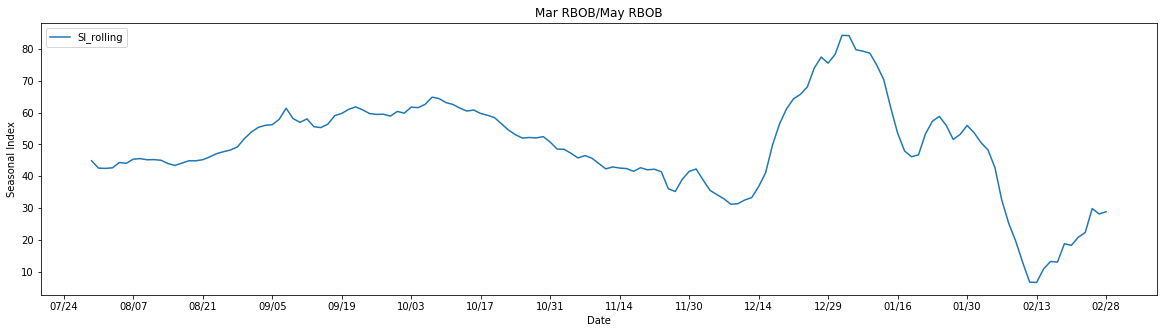

In [490]:

#plot on line chart
ax=Spread_Combi.plot.line(y='SI_rolling',figsize=(20,5),xticks=[x for x in range(0,len(Spread_Combi),10)],title=month1+" "+product1+"/" + month2+" "+product2)
ax.set_xlabel('Date')
ax.set_ylabel('Seasonal Index')
ax.legend(loc=2)